# Data Loading

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

## Loading up the data

In [ ]:
df_wine = pd.read_csv('winequality-red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory Data Analysis

## Missing Values

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Outliers

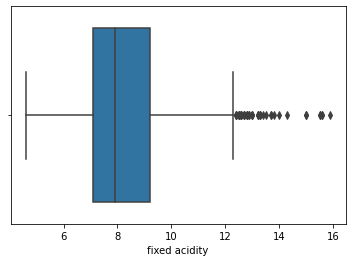

In [ ]:
sns.boxplot(x=df_wine['fixed acidity'])

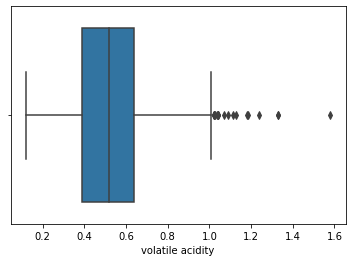

In [ ]:
sns.boxplot(x=df_wine['volatile acidity'])

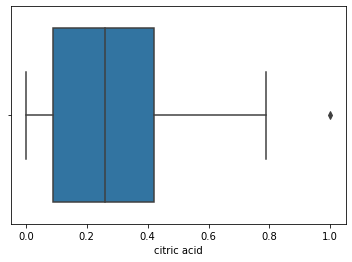

In [ ]:
sns.boxplot(x=df_wine['citric acid'])

## Univariate EDA

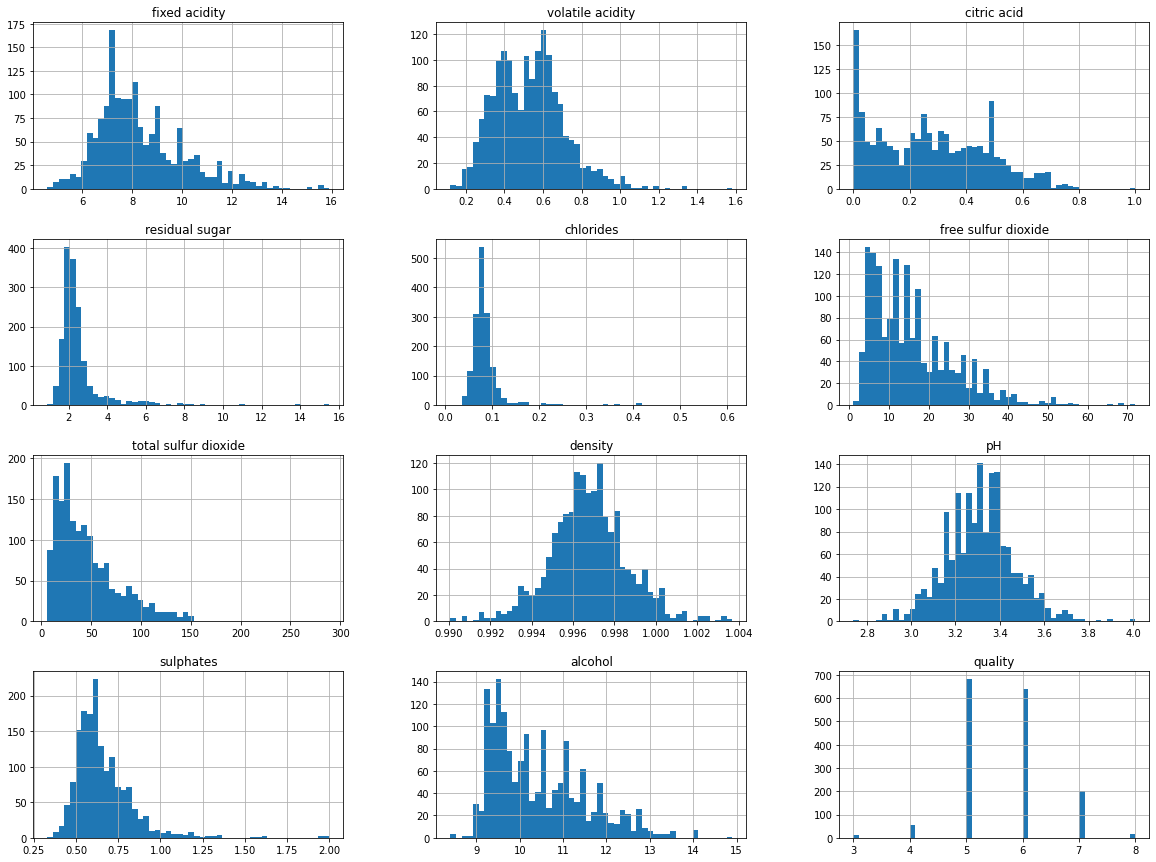

In [ ]:
df_wine.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate EDA

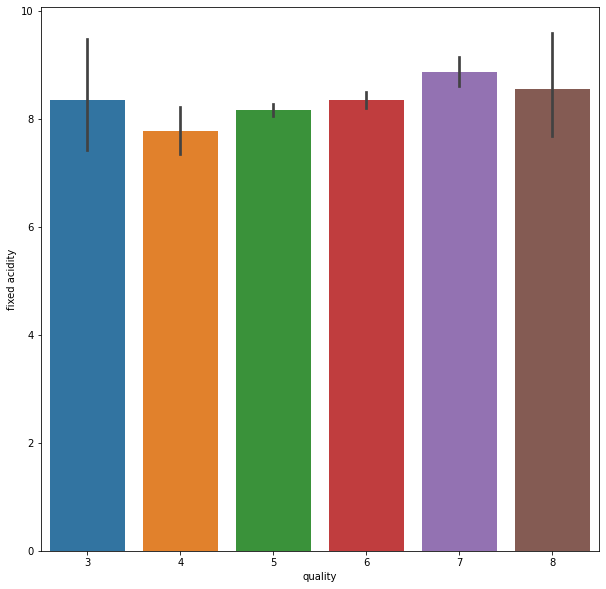

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='fixed acidity', data=df_wine)

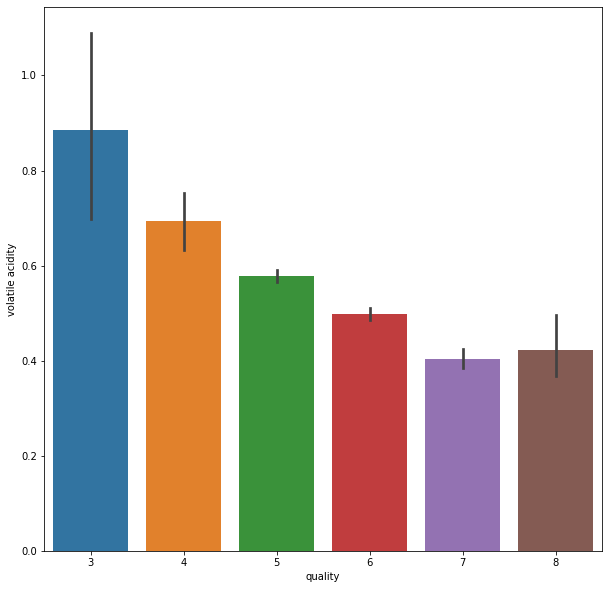

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='volatile acidity', data=df_wine)

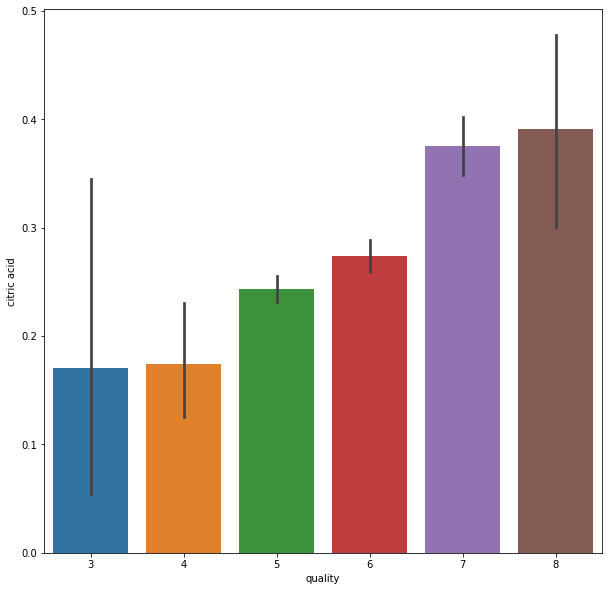

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='quality', y='citric acid', data=df_wine)

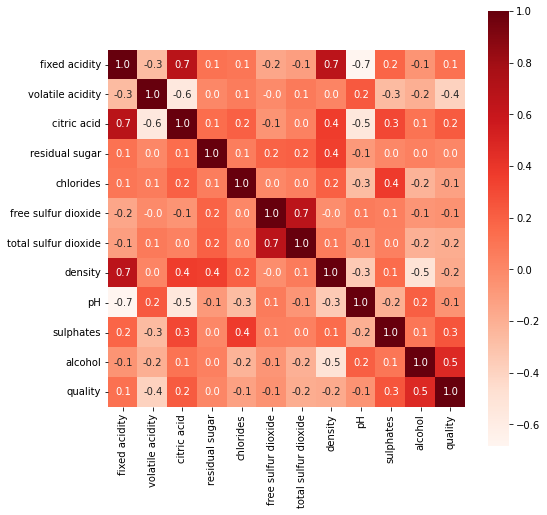

In [ ]:
plt.figure(figsize=(8,8))
corr = df_wine.corr()
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, cmap='Reds')

# Data Preparation

## Label Encoder

In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_wine['quality'] = pd.cut(df_wine['quality'], bins=bins, labels=group_names)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [ ]:
le = LabelEncoder()
df_wine['quality'] = le.fit_transform(df_wine['quality'])
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


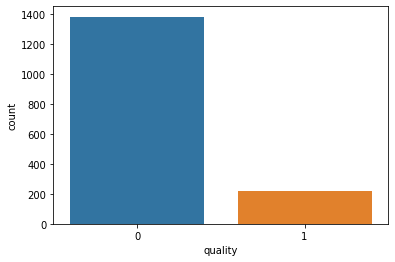

In [ ]:
sns.countplot(df_wine['quality'])

In [ ]:
df_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Splitting Data

In [ ]:
X = df_wine.drop(["quality"], axis =1)
y = df_wine["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Jumlah sample pada dataset: {len(X)}')
print(f'Jumlah sample pada data train: {len(X_train)}')
print(f'Jumlah sample pada data test: {len(X_test)}')

Jumlah sample pada dataset: 1599
Jumlah sample pada data train: 1279
Jumlah sample pada data test: 320


# Modelling

## K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
knn_cv = cross_val_score(knn, X, y, cv=10).mean()

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_acc = accuracy_score(y_test, rf.predict(X_test))
rf_cv = cross_val_score(rf, X, y, cv=10).mean()

## Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

svm_acc = accuracy_score(y_test, svm.predict(X_test))
svm_cv = cross_val_score(svm, X, y, cv=10).mean()

## LightGBM

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))
lgbm_cv = cross_val_score(lgbm, X, y, cv=10).mean()

# Evaluation

In [ ]:
results = {
    'Model': ['K-Nearest Neighbors', 'Random Forest', 'SVM', 'LightGBM'],
    'Accuracy': [knn_acc, rf_acc, svm_acc, lgbm_acc],
    'CV Score': [knn_cv, rf_cv, svm_cv, lgbm_cv],
}

result_model = pd.DataFrame(results)

In [ ]:
result_model

,Model,Accuracy,CV Score
0,K-Nearest Neighbors,0.840625,0.851167
1,Random Forest,0.900000,0.873683
2,SVM,0.856250,0.864292
3,LightGBM,0.912500,0.881824


# Prediction

In [ ]:
lgbm.predict([[7.4, 0.70, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]])

array([0])